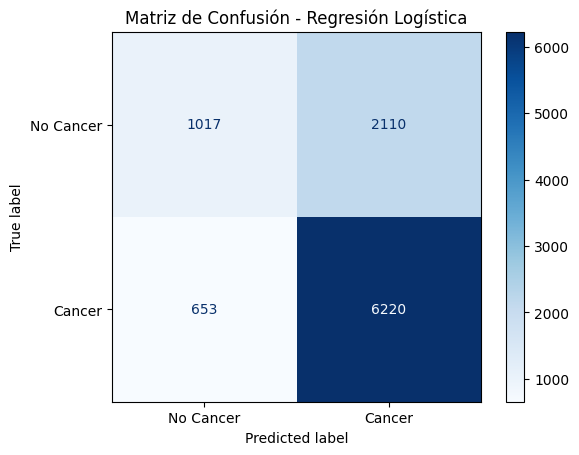

              precision    recall  f1-score   support

   No Cancer       0.61      0.33      0.42      3127
      Cancer       0.75      0.90      0.82      6873

    accuracy                           0.72     10000
   macro avg       0.68      0.62      0.62     10000
weighted avg       0.70      0.72      0.69     10000



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

df = pd.read_csv("/content/lung_cancer_dataset.csv")

X = df.drop(columns=["lung_cancer", "patient_id"])
y = LabelEncoder().fit_transform(df["lung_cancer"])

X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtypes == "object" else col)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

modelo = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)

y_pred = modelo.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No Cancer", "Cancer"], cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

print(classification_report(y_test, y_pred, target_names=["No Cancer", "Cancer"]))
